In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from collections import Counter
%matplotlib inline

scipy.interp = np.interp

# train test split
from sklearn.model_selection import train_test_split

# presentation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# model
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# plot
import scikitplot as skplt

import warnings
from sklearn.decomposition import PCA
import neurokit2 as nk


In [3]:
warnings.filterwarnings('ignore')

In [4]:
mitbih_train = pd.read_csv('data\mitbih_train.csv')
mitbih_test = pd.read_csv('data/mitbih_test.csv')
ptbdb_abnormal = pd.read_csv('data/ptbdb_abnormal.csv')
ptbdb_normal = pd.read_csv('data/ptbdb_normal.csv')

In [5]:
def basic_stuffs(df):
    df = df.copy()
    df.columns = list(range(188))
    df = df.rename(columns={187: 'LABEL'})
    return df

In [6]:
mitbih_train = basic_stuffs(mitbih_train)
mitbih_test = basic_stuffs(mitbih_test)
ptbdb_abnormal = basic_stuffs(ptbdb_abnormal)
ptbdb_normal = basic_stuffs(ptbdb_normal)

# MITBIH

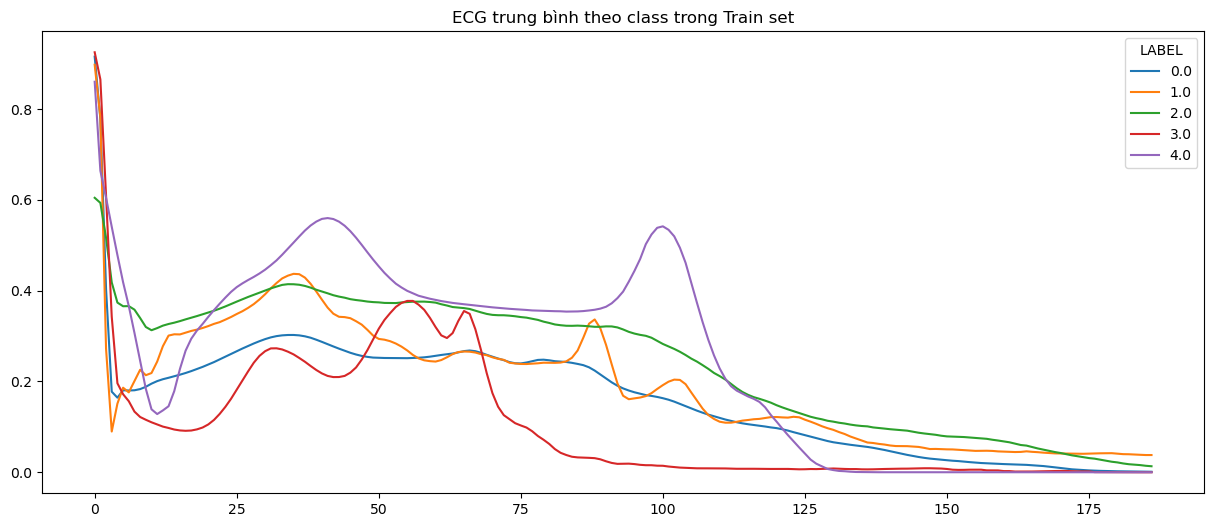

In [7]:
mean_by_class_train = mitbih_train.groupby('LABEL').mean()
# print(mean_by_class_train)
mean_by_class_train.T.plot(figsize=(15,6), title="ECG trung bình theo class trong Train set");
plt.show()

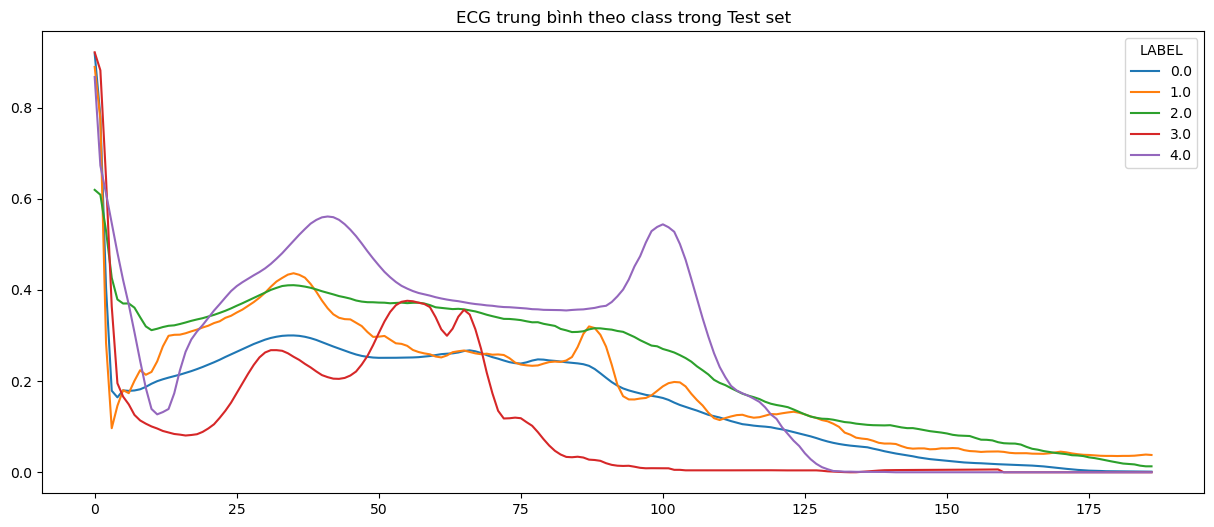

In [8]:
mean_by_class_test = mitbih_test.groupby('LABEL').mean()
# print(mean_by_class_train)
mean_by_class_test.T.plot(figsize=(15,6), title="ECG trung bình theo class trong Test set");
plt.show()

In [9]:
mitbih_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,LABEL
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
mitbih_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 0 to LABEL
dtypes: float64(188)
memory usage: 125.6 MB


In [11]:
mitbih_train.describe(include="all")

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,LABEL
count,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,...,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000
mean,0.890359,0.758158,0.423969,0.219104,0.201127,0.210399,0.205809,0.201774,0.198693,0.196758,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473382
std,0.240910,0.221814,0.227305,0.206880,0.177058,0.171910,0.178482,0.177241,0.171778,0.168358,...,0.044155,0.042089,0.040525,0.038651,0.037193,0.036255,0.034790,0.032865,0.031924,1.143190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682482,0.250965,0.048458,0.082329,0.088415,0.073333,0.066116,0.065000,0.068643,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826007,0.429467,0.165992,0.147870,0.158798,0.145320,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287634,0.298246,0.295393,0.290837,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [12]:
mitbih_train.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
183      0
184      0
185      0
186      0
LABEL    0
Length: 188, dtype: int64

In [13]:
mitbih_train['LABEL'].value_counts()

LABEL
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

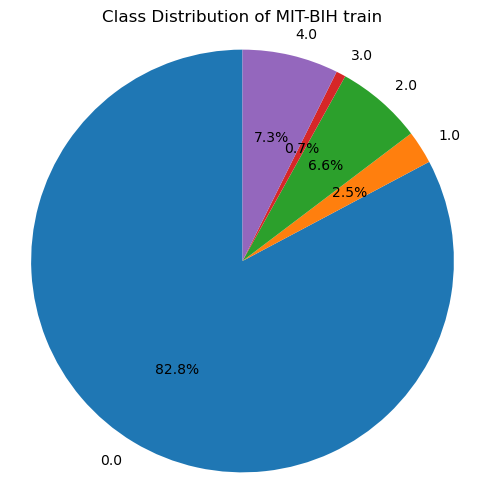

In [14]:
counts = mitbih_train['LABEL'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Class Distribution of MIT-BIH train")
plt.axis('equal')  # để hình tròn chuẩn

plt.show()

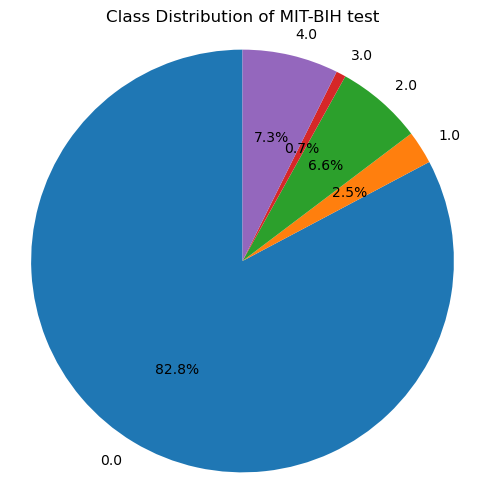

In [ ]:
counts = mitbih_test['LABEL'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Class Distribution of MIT-BIH test")
plt.axis('equal') 

plt.show()

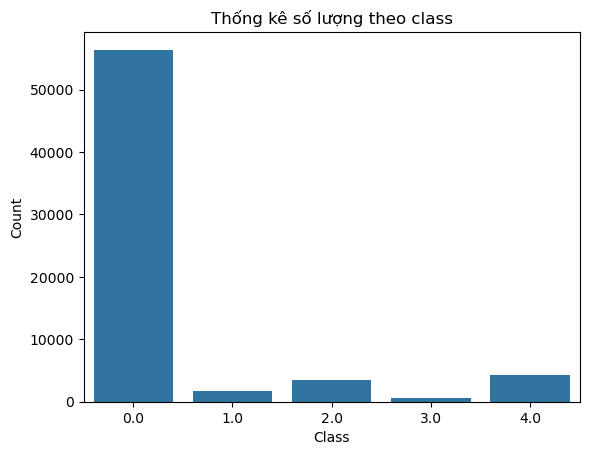

In [17]:
sns.countplot(x='LABEL', data=mitbih_train)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title('Thống kê số lượng theo class')
plt.show()

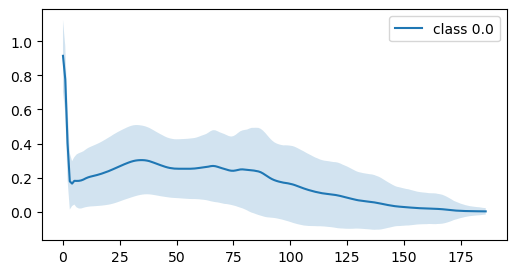

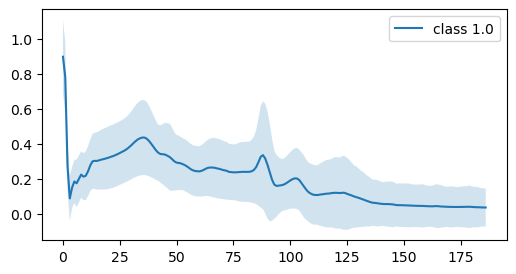

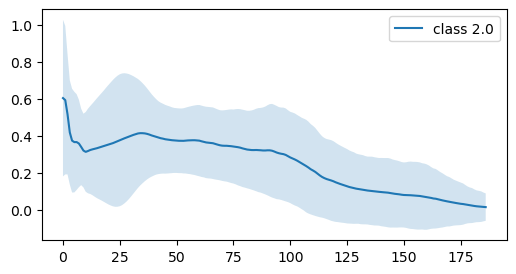

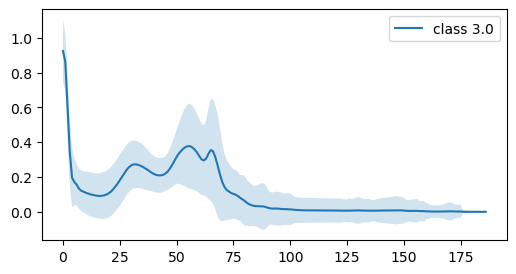

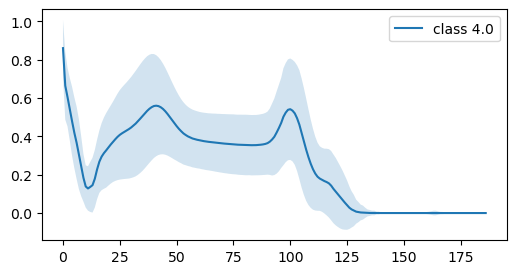

In [18]:
mean_by_class = mitbih_train.groupby("LABEL").mean().T
std_by_class = mitbih_train.groupby("LABEL").std().T

for label in mitbih_train["LABEL"].unique():
    plt.figure(figsize=(6, 3))
    plt.plot(mean_by_class[label], label=f"class {label}")
    plt.fill_between(
        range(len(mean_by_class[label])),
        mean_by_class[label] - std_by_class[label],
        mean_by_class[label] + std_by_class[label],
        alpha=0.2
    )
    plt.legend()
    plt.show()



In [20]:

def calculate_qrs_width_robust(row_data, fs=125):
    """
    Tính độ rộng sóng QRS dựa trên hình học (ngưỡng 50% chiều cao).
    Cách này KHÔNG bao giờ bị nan và chạy cực nhanh.
    """
    # 1. Tìm đỉnh cao nhất (R-peak giả định)
    # Lưu ý: Class V đôi khi âm sâu, nên ta lấy trị tuyệt đối nếu cần, 
    # nhưng MIT-BIH thường đã chuẩn hóa dương. Ta cứ tìm max.
    r_idx = np.argmax(row_data)
    r_height = row_data[r_idx]
    
    # Nếu tín hiệu quá yếu (đường thẳng), trả về 0
    if r_height < 0.05: 
        return 0.0
    
    # 2. Ngưỡng cắt = 50% chiều cao đỉnh
    threshold = r_height * 0.5
    
    # 3. Tìm các điểm vượt qua ngưỡng
    # Đoạn code này tìm điểm cắt bên trái và bên phải của đỉnh R
    
    # Quét sang trái từ đỉnh R
    left_idx = r_idx
    while left_idx > 0 and row_data[left_idx] > threshold:
        left_idx -= 1
        
    # Quét sang phải từ đỉnh R
    right_idx = r_idx
    while right_idx < len(row_data) - 1 and row_data[right_idx] > threshold:
        right_idx += 1
        
    # 4. Tính độ rộng (số mẫu)
    width_samples = right_idx - left_idx
    
    # 5. Đổi ra ms
    width_ms = (width_samples / fs) * 1000
    
    return width_ms

# --- Test lại với đúng cái mẫu bị lỗi ban nãy ---
# Lấy 1 mẫu Class V bất kỳ
sample_v = mitbih_train[mitbih_train.iloc[:, -1] == 2.0].iloc[0, :-1].values

# width = calculate_qrs_width_robust(sample_v)
# print(f"✅ QRS Width (Class V) calculated: {width:.2f} ms")

# --- Nếu bạn muốn chạy cho toàn bộ X_train ---
X_train_signals = mitbih_train.iloc[:, :-1].values
widths = [calculate_qrs_width_robust(row) for row in X_train_signals]
print(widths)

[40.0, 16.0, 40.0, 32.0, 24.0, 24.0, 64.0, 40.0, 24.0, 40.0, 16.0, 48.0, 24.0, 8.0, 32.0, 16.0, 32.0, 24.0, 48.0, 40.0, 24.0, 40.0, 24.0, 16.0, 48.0, 32.0, 64.0, 40.0, 40.0, 16.0, 64.0, 16.0, 16.0, 16.0, 16.0, 56.0, 584.0, 24.0, 24.0, 16.0, 32.0, 24.0, 40.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 24.0, 16.0, 56.0, 16.0, 24.0, 48.0, 64.0, 24.0, 40.0, 40.0, 848.0, 56.0, 16.0, 48.0, 16.0, 16.0, 16.0, 40.0, 8.0, 40.0, 48.0, 24.0, 56.0, 64.0, 24.0, 32.0, 32.0, 40.0, 24.0, 40.0, 40.0, 64.0, 32.0, 48.0, 16.0, 32.0, 72.0, 16.0, 16.0, 24.0, 16.0, 48.0, 24.0, 24.0, 24.0, 24.0, 520.0, 40.0, 24.0, 600.0, 16.0, 16.0, 16.0, 16.0, 48.0, 16.0, 56.0, 32.0, 40.0, 24.0, 40.0, 16.0, 168.0, 64.0, 40.0, 56.0, 24.0, 48.0, 536.0, 24.0, 32.0, 32.0, 24.0, 16.0, 40.0, 16.0, 16.0, 40.0, 48.0, 24.0, 24.0, 16.0, 48.0, 32.0, 48.0, 24.0, 688.0, 24.0, 48.0, 16.0, 16.0, 24.0, 16.0, 16.0, 32.0, 16.0, 16.0, 24.0, 16.0, 16.0, 856.0, 16.0, 40.0, 24.0, 40.0, 40.0, 56.0, 32.0, 16.0, 48.0, 16.0, 48.0, 1152.0, 16.0, 16.0, 40.0, 2

In [21]:
def get_qrs_width(data, fs=125):
    """
    Tính độ rộng QRS tại ngưỡng 50% chiều cao đỉnh R.
    Input: data (1D array) - 1 nhịp tim (187 mẫu)
    Output: Width (ms)
    """
    # 1. Tìm đỉnh R (Max)
    r_idx = np.argmax(data)
    r_height = data[r_idx]
    
    # Nếu tín hiệu quá thấp (nhiễu/đường thẳng), trả về 0
    if r_height < 0.1: 
        return 0.0

    # 2. Xác định ngưỡng (50% chiều cao)
    threshold = r_height * 0.5
    
    # 3. Quét sang TRÁI từ đỉnh R để tìm điểm bắt đầu (QRS Onset giả định)
    left_idx = r_idx
    while left_idx > 0 and data[left_idx] > threshold:
        left_idx -= 1
        
    # 4. Quét sang PHẢI từ đỉnh R để tìm điểm kết thúc (QRS Offset giả định)
    right_idx = r_idx
    while right_idx < len(data) - 1 and data[right_idx] > threshold:
        right_idx += 1
        
    # 5. Tính độ rộng (số mẫu * thời gian mỗi mẫu)
    # Nhân 1000 để đổi ra ms
    width_samples = right_idx - left_idx
    width_ms = (width_samples / fs) * 1000
    
    return width_ms

# --- Test thử với 1 mẫu Class V (thường bị lỗi nan) ---
# Lấy mẫu đầu tiên của Class 2.0 (V)
# sample_2 = mitbih_train[mitbih_train.iloc[:, -1] == 2.0].iloc[0, :-1].values

# width = get_qrs_width_robust(sample_2)
# print(f"Computed QRS Width: {width:.2f} ms")

qrs_0 = mitbih_train[mitbih_train.iloc[:, -1] == 0.0].iloc[:, :-1].values
widths_0 = [get_qrs_width(row) for row in qrs_0]
print(widths_0)


[40.0, 16.0, 40.0, 32.0, 24.0, 24.0, 64.0, 40.0, 24.0, 40.0, 16.0, 48.0, 24.0, 8.0, 32.0, 16.0, 32.0, 24.0, 48.0, 40.0, 24.0, 40.0, 24.0, 16.0, 48.0, 32.0, 64.0, 40.0, 40.0, 16.0, 64.0, 16.0, 16.0, 16.0, 16.0, 56.0, 584.0, 24.0, 24.0, 16.0, 32.0, 24.0, 40.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 24.0, 16.0, 56.0, 16.0, 24.0, 48.0, 64.0, 24.0, 40.0, 40.0, 848.0, 56.0, 16.0, 48.0, 16.0, 16.0, 16.0, 40.0, 8.0, 40.0, 48.0, 24.0, 56.0, 64.0, 24.0, 32.0, 32.0, 40.0, 24.0, 40.0, 40.0, 64.0, 32.0, 48.0, 16.0, 32.0, 72.0, 16.0, 16.0, 24.0, 16.0, 48.0, 24.0, 24.0, 24.0, 24.0, 520.0, 40.0, 24.0, 600.0, 16.0, 16.0, 16.0, 16.0, 48.0, 16.0, 56.0, 32.0, 40.0, 24.0, 40.0, 16.0, 168.0, 64.0, 40.0, 56.0, 24.0, 48.0, 536.0, 24.0, 32.0, 32.0, 24.0, 16.0, 40.0, 16.0, 16.0, 40.0, 48.0, 24.0, 24.0, 16.0, 48.0, 32.0, 48.0, 24.0, 688.0, 24.0, 48.0, 16.0, 16.0, 24.0, 16.0, 16.0, 32.0, 16.0, 16.0, 24.0, 16.0, 16.0, 856.0, 16.0, 40.0, 24.0, 40.0, 40.0, 56.0, 32.0, 16.0, 48.0, 16.0, 48.0, 1152.0, 16.0, 16.0, 40.0, 2

In [22]:
# 1. Lấy toàn bộ dữ liệu tín hiệu (X) và toàn bộ nhãn (y)
# Thay vì chỉ lấy class 0, ta lấy hết
X_all = mitbih_train.iloc[:, :-1].values
y_all = mitbih_train.iloc[:, -1].values

# 2. Tính QRS Width cho TOÀN BỘ dữ liệu
# (Lệnh này sẽ chạy mất khoảng 10-30 giây vì phải tính cho gần 100k dòng)
print("Đang tính toán QRS Width cho toàn bộ dữ liệu...")
all_widths = [get_qrs_width(row) for row in X_all]

# 3. Tạo DataFrame df_qrs (Đây chính là cái bạn đang thiếu)
df_qrs = pd.DataFrame({
    'Label': y_all,
    'QRS_Duration_ms': all_widths
})

# 4. Đặt tên Class cho dễ hiểu (để lúc vẽ hiện chữ N, S, V thay vì số 0, 1, 2)
label_map = {
    0.0: 'N (Normal)', 
    1.0: 'S (Supra)', 
    2.0: 'V (Ventricular)', 
    3.0: 'F (Fusion)', 
    4.0: 'Q (Unknown)'
}
df_qrs['Type'] = df_qrs['Label'].map(label_map)

# Kiểm tra kết quả
print("Đã tạo xong df_qrs!")
print(df_qrs.head())

Đang tính toán QRS Width cho toàn bộ dữ liệu...
Đã tạo xong df_qrs!
   Label  QRS_Duration_ms        Type
0    0.0             40.0  N (Normal)
1    0.0             16.0  N (Normal)
2    0.0             40.0  N (Normal)
3    0.0             32.0  N (Normal)
4    0.0             24.0  N (Normal)


In [23]:
print(df_qrs[df_qrs['Label']==3]['QRS_Duration_ms'].median())

24.0


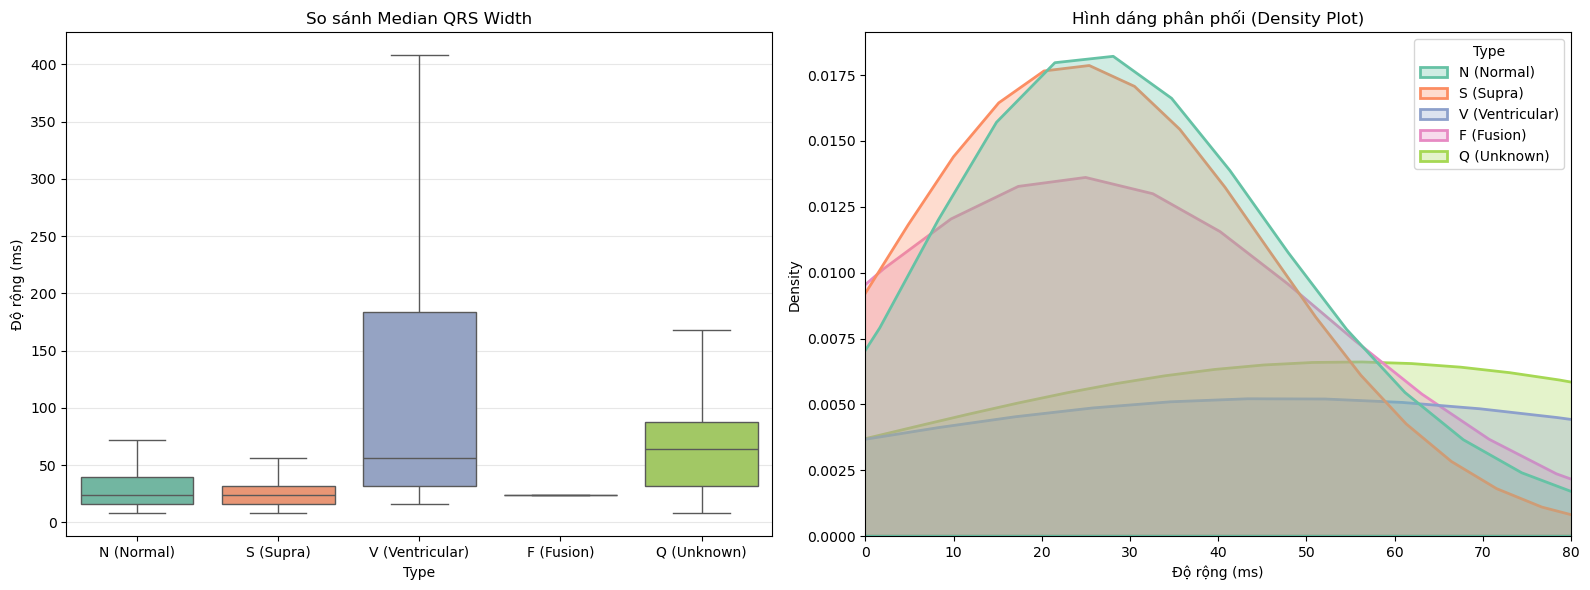

In [ ]:
plt.figure(figsize=(16, 6))

# --- HÌNH 1: Boxplot (So sánh độ cao/thấp) ---
plt.subplot(1, 2, 1);
# showfliers=False: Ẩn bớt các điểm nhiễu ngoại lai (outliers) để hình đỡ rối
sns.boxplot(data=df_qrs, x='Type', y='QRS_Duration_ms', palette='Set2', showfliers=False);
plt.title("So sánh Median QRS Width")
plt.ylabel("Độ rộng (ms)")
plt.grid(axis='y', alpha=0.3)

# --- HÌNH 2: KDE Plot (So sánh hình dáng Phân phối) ---
plt.subplot(1, 2, 2);
sns.kdeplot(
    data=df_qrs, 
    x='QRS_Duration_ms', 
    hue='Type', 
    common_norm=False, 
    fill=True, 
    palette='Set2',
    alpha=0.3,
    linewidth=2
);
plt.title("Hình dáng phân phối (Density Plot)")
plt.xlabel("Độ rộng (ms)")
plt.xlim(0, 80) 

plt.tight_layout()
plt.show()

In [25]:
train = mitbih_train
test = mitbih_test
external = pd.concat([ptbdb_normal, ptbdb_abnormal], axis=0, ignore_index=True)
train_ex, test_ex = train_test_split(external, test_size=0.2, random_state=67, shuffle=True)

X_train = train.iloc[:, :-1]
Y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
Y_test = test.iloc[:, -1]

X_train_ex = train_ex.iloc[:, :-1]
Y_train_ex = train_ex.iloc[:, -1]

X_test_ex = test_ex.iloc[:, :-1]
Y_test_ex = test_ex.iloc[:, -1]

X_train.to_pickle("X_train.pkl")
Y_train.to_pickle("Y_train.pkl")
X_test.to_pickle("X_test.pkl")
Y_test.to_pickle("Y_test.pkl")

X_train_ex.to_pickle("X_train_ex.pkl")
Y_train_ex.to_pickle("Y_train_ex.pkl")
X_test_ex.to_pickle("X_test_ex.pkl")
Y_test_ex.to_pickle("Y_test_ex.pkl")

In [26]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


# PTBDB


In [29]:
total_ptbdb = pd.concat(
    [ptbdb_abnormal, ptbdb_normal],
    axis=0,
    ignore_index=True
)

LABEL
1.0    10505
0.0     4045
Name: count, dtype: int64


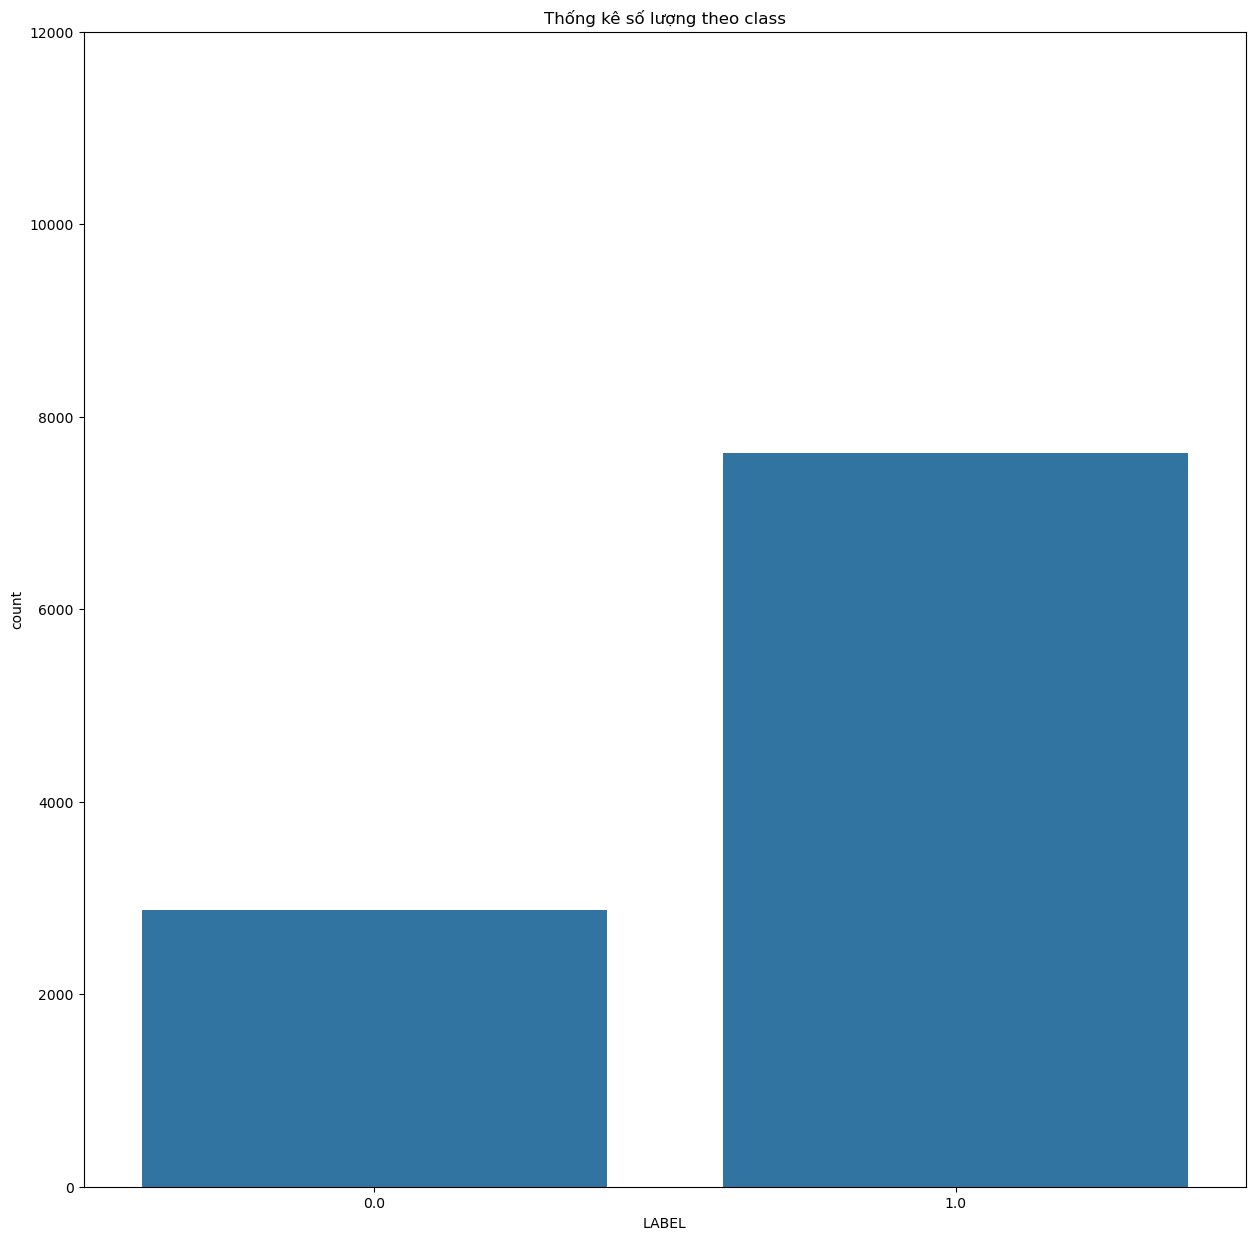

In [30]:
print(total_ptbdb['LABEL'].value_counts())
plt.figure(figsize=(15, 15))
plt.ylim(0, 12000)
sns.countplot(x='LABEL', data=total_ptbdb)
plt.title('Thống kê số lượng theo class')
plt.show()

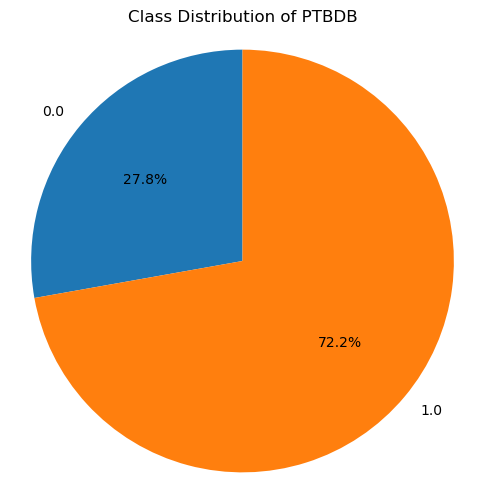

In [31]:
counts = total_ptbdb['LABEL'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Class Distribution of PTBDB")
plt.axis('equal')  # để hình tròn chuẩn

plt.show()

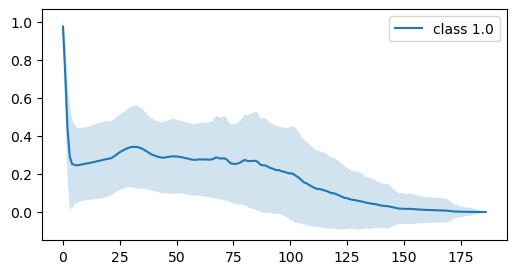

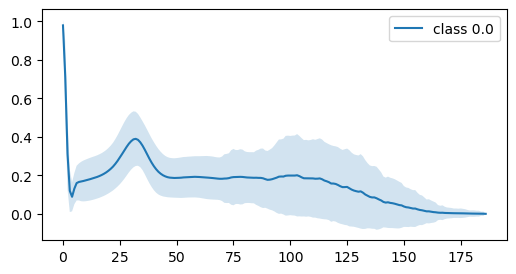

In [32]:
mean_by_class = total_ptbdb.groupby("LABEL").mean().T
std_by_class = total_ptbdb.groupby("LABEL").std().T

for label in total_ptbdb["LABEL"].unique():
    plt.figure(figsize=(6, 3))
    plt.plot(mean_by_class[label], label=f"class {label}")
    plt.fill_between(
        range(len(mean_by_class[label])),
        mean_by_class[label] - std_by_class[label],
        mean_by_class[label] + std_by_class[label],
        alpha=0.2
    )
    plt.legend()
    plt.show()



In [33]:
X_ptbdb = total_ptbdb.iloc[:, :-1].values
widths_ptbdb = [calculate_qrs_width_robust(row) for row in X_ptbdb]
print(widths_ptbdb)

[16.0, 288.0, 24.0, 40.0, 32.0, 32.0, 24.0, 24.0, 56.0, 176.0, 40.0, 24.0, 16.0, 32.0, 16.0, 656.0, 96.0, 8.0, 24.0, 24.0, 16.0, 40.0, 16.0, 8.0, 64.0, 48.0, 40.0, 24.0, 32.0, 24.0, 8.0, 1104.0, 16.0, 16.0, 24.0, 56.0, 16.0, 16.0, 16.0, 16.0, 16.0, 8.0, 16.0, 40.0, 168.0, 8.0, 24.0, 64.0, 64.0, 32.0, 32.0, 40.0, 16.0, 16.0, 72.0, 40.0, 16.0, 72.0, 16.0, 24.0, 32.0, 16.0, 80.0, 16.0, 16.0, 32.0, 16.0, 16.0, 32.0, 32.0, 24.0, 16.0, 8.0, 40.0, 32.0, 16.0, 16.0, 8.0, 8.0, 24.0, 40.0, 32.0, 16.0, 40.0, 16.0, 16.0, 24.0, 32.0, 16.0, 16.0, 16.0, 16.0, 24.0, 8.0, 32.0, 40.0, 16.0, 48.0, 32.0, 24.0, 16.0, 240.0, 16.0, 24.0, 24.0, 16.0, 16.0, 40.0, 32.0, 16.0, 136.0, 8.0, 128.0, 24.0, 16.0, 32.0, 16.0, 32.0, 8.0, 72.0, 40.0, 32.0, 24.0, 8.0, 16.0, 40.0, 32.0, 8.0, 16.0, 16.0, 8.0, 16.0, 16.0, 24.0, 16.0, 72.0, 32.0, 16.0, 40.0, 8.0, 16.0, 16.0, 16.0, 32.0, 32.0, 24.0, 32.0, 1104.0, 24.0, 32.0, 16.0, 32.0, 40.0, 8.0, 32.0, 584.0, 16.0, 8.0, 16.0, 32.0, 32.0, 56.0, 48.0, 16.0, 24.0, 64.0, 64.0, 16

In [34]:
Y_ptbdb = total_ptbdb.iloc[:, -1].values

df_qrs_ptbdb = pd.DataFrame({
    'Label': Y_ptbdb,
    'QRS_Duration_ms': widths_ptbdb
})

label_map = {
    0.0: 'Normal', 
    1.0: 'Abnormal'
}

df_qrs_ptbdb['Type'] = df_qrs_ptbdb['Label'].map(label_map)

print(df_qrs_ptbdb.head())

   Label  QRS_Duration_ms      Type
0    1.0             16.0  Abnormal
1    1.0            288.0  Abnormal
2    1.0             24.0  Abnormal
3    1.0             40.0  Abnormal
4    1.0             32.0  Abnormal


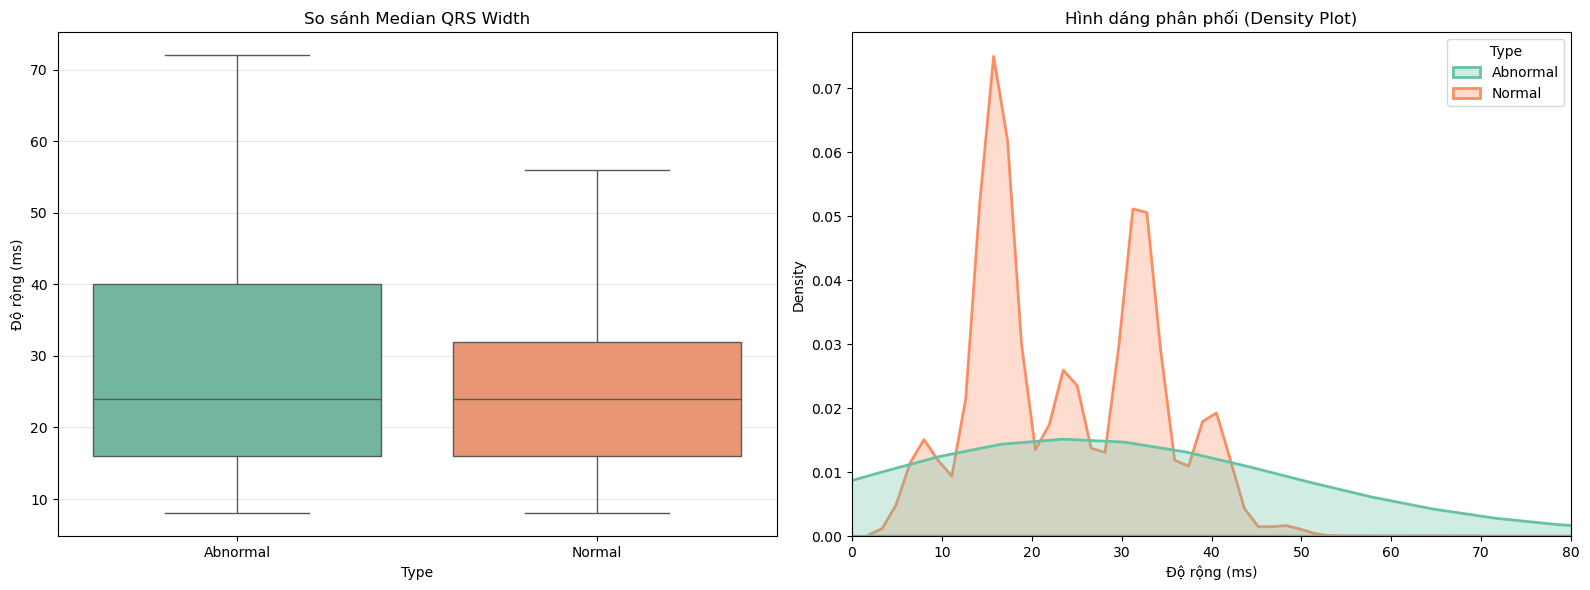

In [35]:
plt.figure(figsize=(16, 6))

# --- HÌNH 1: Boxplot (So sánh độ cao/thấp) ---
plt.subplot(1, 2, 1);
# showfliers=False: Ẩn bớt các điểm nhiễu ngoại lai (outliers) để hình đỡ rối
sns.boxplot(data=df_qrs_ptbdb, x='Type', y='QRS_Duration_ms', palette='Set2', showfliers=False);
plt.title("So sánh Median QRS Width")
plt.ylabel("Độ rộng (ms)")
plt.grid(axis='y', alpha=0.3)

# --- HÌNH 2: KDE Plot (So sánh hình dáng Phân phối) ---
plt.subplot(1, 2, 2);
# common_norm=False: Để chuẩn hóa từng class riêng biệt (rất quan trọng vì data lệch)
# fill=True: Tô màu bên dưới đường cong cho đẹp
sns.kdeplot(
    data=df_qrs_ptbdb, 
    x='QRS_Duration_ms', 
    hue='Type', 
    common_norm=False, 
    fill=True, 
    palette='Set2',
    alpha=0.3,
    linewidth=2
);
plt.title("Hình dáng phân phối (Density Plot)")
plt.xlabel("Độ rộng (ms)")
plt.xlim(0, 80) # Giới hạn trục X từ 0 đến 80ms để zoom vào phần quan trọng

plt.tight_layout()
plt.show()

In [36]:
df = total_ptbdb

In [37]:
normal_df = df[df.iloc[:, -1] == 0].iloc[:, :-1]
abnormal_df = df[df.iloc[:, -1] == 1].iloc[:, :-1]

# Tính nhịp trung bình (Mean Beat)
mean_normal = normal_df.mean(axis=0).values
mean_abnormal = abnormal_df.mean(axis=0).values

# --- KỸ THUẬT BASELINE CORRECTION ---
# Lấy trung bình 20 điểm cuối cùng làm mốc 0 (Baseline)
baseline_window = slice(160, 187) 
bias_normal = np.mean(mean_normal[baseline_window])
bias_abnormal = np.mean(mean_abnormal[baseline_window])

# Dịch chuyển đồ thị để baseline trùng nhau tại 0
mean_normal_corrected = mean_normal - bias_normal
mean_abnormal_corrected = mean_abnormal - bias_abnormal

# ==========================================
# 3. VẼ ĐỒ THỊ SO SÁNH (EDA)
# ==========================================
plt.figure(figsize=(14, 6))

# --- PLOT 1: TOÀN BỘ NHỊP TIM ---
plt.subplot(1, 2, 1)
plt.plot(mean_normal_corrected, label='Normal (Class 0)', color='blue', linewidth=2)
plt.plot(mean_abnormal_corrected, label='Abnormal (Class 1)', color='red', linewidth=2, linestyle='--')

# Tô màu vùng ST (Dự đoán từ index 20 đến 60)
plt.axvspan(20, 60, color='yellow', alpha=0.2, label='ST Region')
plt.axvspan(160, 187, color='gray', alpha=0.2, label='Baseline Ref')

plt.title('So sánh khoảng ST')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

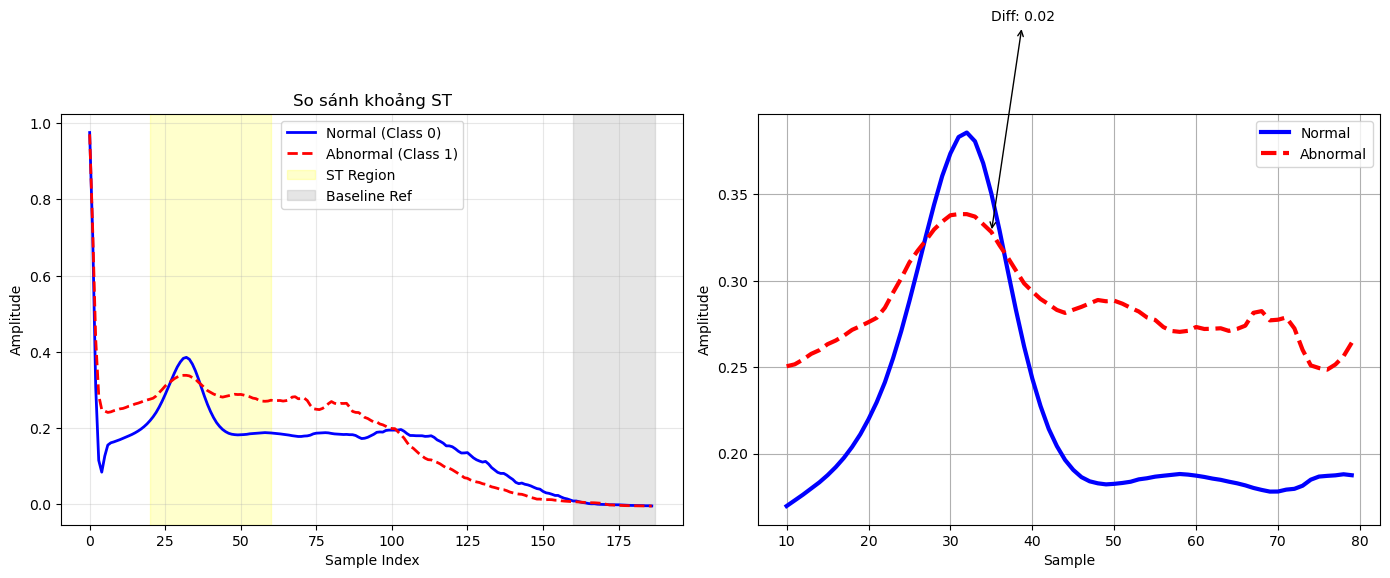

--- THỐNG KÊ ĐOẠN ST (Index 25-45) ---
Độ dốc trung bình (Slope) - Normal:   -0.0048 (Dương -> Đang leo dốc tạo sóng T)
Độ dốc trung bình (Slope) - Abnormal: -0.0015 (Gần 0 hoặc Âm -> Đi ngang/Dẹt)


In [ ]:
plt.subplot(1, 2, 2)
# Zoom vào đoạn quan trọng (từ đỉnh R đến hết sóng T)
zoom_range = slice(10, 80) 
idx = np.arange(187) # Tạo trục index

plt.plot(idx[zoom_range], mean_normal_corrected[zoom_range], label='Normal', color='blue', linewidth=3)
plt.plot(idx[zoom_range], mean_abnormal_corrected[zoom_range], label='Abnormal', color='red', linewidth=3, linestyle='--')

# Vẽ mũi tên chú thích sự khác biệt
mid_point = 35
diff = mean_normal_corrected[mid_point] - mean_abnormal_corrected[mid_point]
plt.annotate(f'Diff: {diff:.2f}', 
             xy=(mid_point, mean_abnormal_corrected[mid_point]), 
             xytext=(mid_point, mean_normal_corrected[mid_point] + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='<->'))

plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# ==========================================
# 4. IN RA CHỈ SỐ THỐNG KÊ
# ==========================================
st_window = slice(25, 45) # Vùng trung tâm đoạn ST
st_slope_normal = np.mean(np.diff(mean_normal_corrected[st_window]))
st_slope_abnormal = np.mean(np.diff(mean_abnormal_corrected[st_window]))

print(f"--- THỐNG KÊ ĐOẠN ST (Index 25-45) ---")
print(f"Độ dốc trung bình (Slope) - Normal:   {st_slope_normal:.4f} (Dương -> Đang leo dốc tạo sóng T)")
print(f"Độ dốc trung bình (Slope) - Abnormal: {st_slope_abnormal:.4f} (Gần 0 hoặc Âm -> Đi ngang/Dẹt)")